<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization-and-of-useful-function" data-toc-modified-id="Initialization-and-of-useful-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization and of useful function</a></span></li><li><span><a href="#Taking-example-of-intel-for-share-price-visualization-with-SMA-of-20-and-50" data-toc-modified-id="Taking-example-of-intel-for-share-price-visualization-with-SMA-of-20-and-50-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Taking example of intel for share price visualization with SMA of 20 and 50</a></span></li><li><span><a href="#Interquantile-range-AD-from-ADTK-detector" data-toc-modified-id="Interquantile-range-AD-from-ADTK-detector-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interquantile range AD from ADTK detector</a></span></li><li><span><a href="#Temporal-difference-between-value" data-toc-modified-id="Temporal-difference-between-value-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Temporal difference between value</a></span></li><li><span><a href="#Analyze-other-stock.-Please-get-the-stock-code-from-yahoo-finance." data-toc-modified-id="Analyze-other-stock.-Please-get-the-stock-code-from-yahoo-finance.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyze other stock. Please get the stock code from yahoo finance.</a></span><ul class="toc-item"><li><span><a href="#Calculate-average-return-over-period-of-time-stated" data-toc-modified-id="Calculate-average-return-over-period-of-time-stated-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Calculate average return over period of time stated</a></span></li></ul></li><li><span><a href="#Moving-Average-Strategy-Back-Test" data-toc-modified-id="Moving-Average-Strategy-Back-Test-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Moving Average Strategy Back Test</a></span></li><li><span><a href="#Misc-on-analyzing-general-trend-of-indexes-of-KLSE-and-Nasdaq-(IXIC)" data-toc-modified-id="Misc-on-analyzing-general-trend-of-indexes-of-KLSE-and-Nasdaq-(IXIC)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Misc on analyzing general trend of indexes of KLSE and Nasdaq (IXIC)</a></span></li><li><span><a href="#Parsing-the-quarterly-report-out-from-yahoo-finance" data-toc-modified-id="Parsing-the-quarterly-report-out-from-yahoo-finance-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Parsing the quarterly report out from yahoo finance</a></span></li><li><span><a href="#Facebook-prophet-API-on-change-point-detection" data-toc-modified-id="Facebook-prophet-API-on-change-point-detection-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Facebook prophet API on change point detection</a></span></li></ul></div>

## Initialization and of useful function 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pyfolio as pf

C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
# Template code for use on stock visualization
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import matplotlib.dates as mpl_dates
import fix_yahoo_finance as yf


plt.style.use('ggplot')

def plot_chart(df,stock_name):
    # Extracting Data for plotting
    data = df
    ohlc = data.loc[:, ['Open', 'High', 'Low', 'Close','Volume']]
    mpf.plot(ohlc,type='candle',style='charles',mav=(20,50),volume=True)

    # Setting labels & titles
    # ax.set_xlabel('Date')
    # ax.set_ylabel('Price')
    # fig.suptitle('Daily Candlestick Chart of NIFTY50')

    # # Formatting Date
    # date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    # ax.xaxis.set_major_formatter(date_format)
    # fig.autofmt_xdate()

    # fig.tight_layout()

    plt.show()
    return

C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



## Taking example of intel for share price visualization with SMA of 20 and 50

In [115]:
stock_name = 'INTC'
data_INTEL= yf.pdr_override(stock_name,start='2019-1-1')['Adj Close']
# plot_chart(data_INTEL,stock_name)

[*********************100%***********************]  1 of 1 completed


[<AxesSubplot:>]

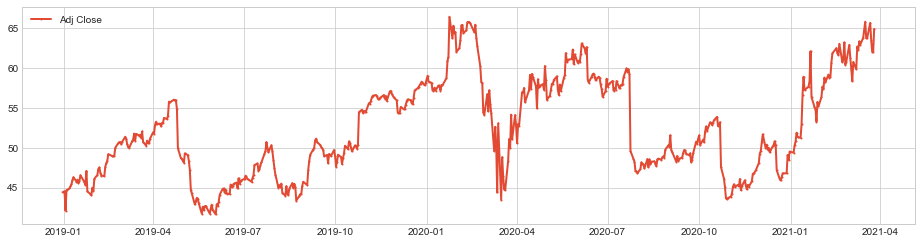

In [4]:
from adtk.data import validate_series
s = validate_series(data_INTEL)
from adtk.visualization import plot
plot(s,ts_linewidth=2)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

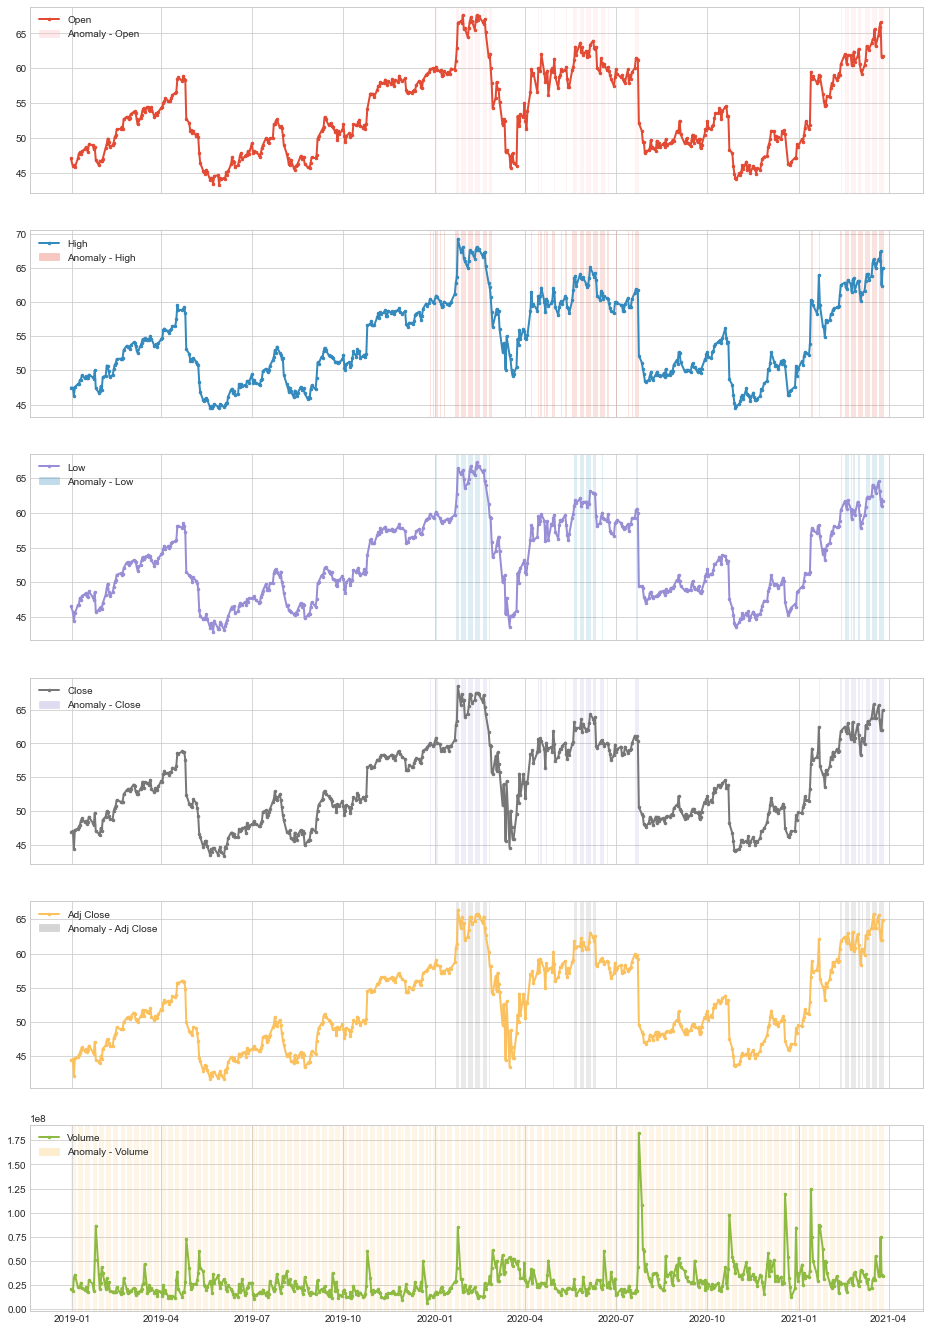

In [5]:
from adtk.detector import ThresholdAD
threshold_ad = ThresholdAD(high=60,low=40)
anomalies = threshold_ad.detect(s)
plot(s,anomaly=anomalies,ts_linewidth=2,ts_markersize=5)


In [17]:
anomalies = threshold_ad.detect(s,return_list=True)

In [18]:
anomalies

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-19 00:00:00'),
 Timestamp('2020-02-20 00:00:00'),
 Timestamp('2020-02-21 00:00:00'),
 Timestamp('2020-02-24 00:00:00'),
 Timestamp('2020-04-29 00:00:00'),
 Timestamp('2020-05-20 00:00:00'),
 Timestamp('2020-05-21 00:00:00'),
 Timestamp('2020-05-22 00:00:00'),
 Timestamp('2020-05-26 00:00:00'),
 Timestamp('2020-05-

In [23]:
# Using quantile kind of limiting fit.

[<AxesSubplot:>]

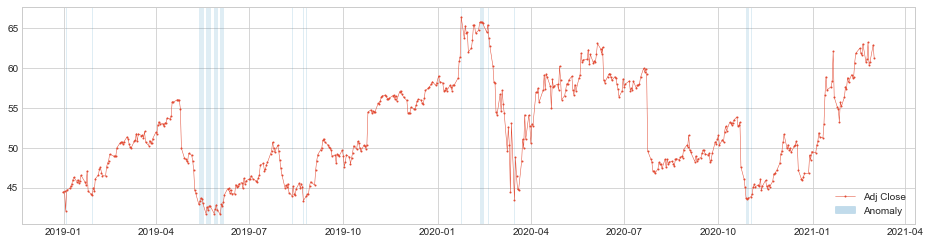

In [26]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99,low=0.05)
anomalies = quantile_ad.fit_detect(s)
plot(s,anomaly=anomalies)

## Interquantile range AD from ADTK detector 

InterQuartileRangeAD is another widely used detector based on simple historical statistics is based on interquartile range (IQR). When a value is out of the range defined by [Q1−c×IQR, Q3+c×IQR] where IQR=Q3−Q1 is the difference between 25% and 75% quantiles. This detector is usually preferred to QuantileAD in the case where only a tiny portion or even none of training data is anomalous.

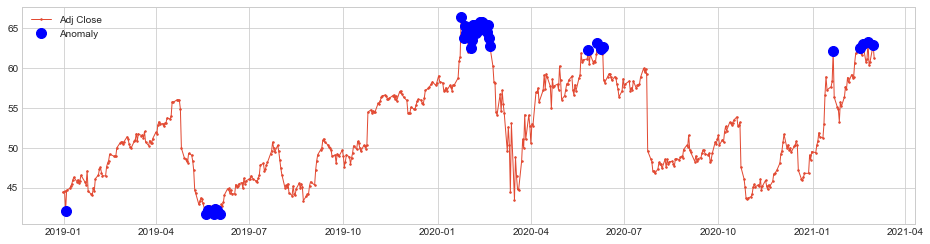

In [40]:
from adtk.detector import InterQuartileRangeAD

iqr_ad = InterQuartileRangeAD(c=0.5)
anomalies = iqr_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=10, anomaly_color='blue', anomaly_tag="marker");


## Temporal difference between value
as previous section of 3 method disregard temporal difference between value however if we look at the case below using the method we have above without considering temporal difference will not detect the sudden jump

[<AxesSubplot:>]

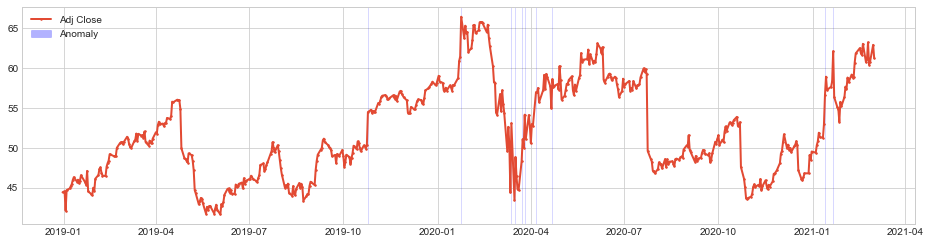

In [43]:
from adtk.detector import PersistAD
persist_ad = PersistAD(c=3.0,side='positive')
anomalies = persist_ad.fit_detect(s)
plot(s,anomaly=anomalies,ts_linewidth=2,ts_markersize=3,anomaly_color='blue')

However this doesnt really make sense at certain instance as you can see those spike that doesnt relate to the previous trend

In [28]:
persist_ad.window = 10
anomalies = persist_ad.fit_detect(s)
plot(s,anomaly=anomalies,ts_linewidth=2,anomaly_color='blue')

NameError: name 'persist_ad' is not defined

Lets go for level shifting

[<AxesSubplot:>]

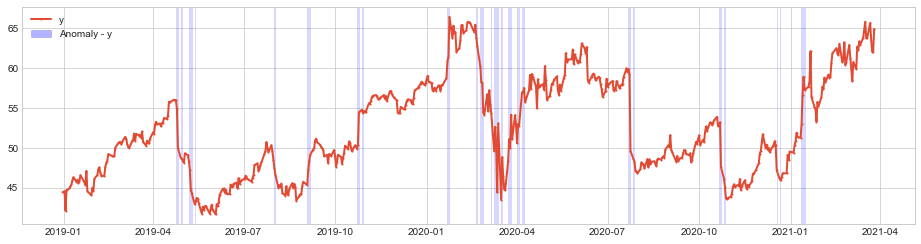

In [29]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=1,side='both',window=5)
anomalies = level_shift_ad.fit_detect(s,return_list=True)
plot(s,anomaly=anomalies,ts_linewidth=2,anomaly_color='blue')

In [86]:
change_point = [str(x) for x in anomalies['y']]

In [87]:
change_point

['2019-04-24 00:00:00',
 '2019-04-25 00:00:00',
 '2019-04-26 00:00:00',
 '2019-04-29 00:00:00',
 '2019-04-30 00:00:00',
 '2019-05-07 00:00:00',
 '2019-05-08 00:00:00',
 '2019-05-09 00:00:00',
 '2019-05-10 00:00:00',
 '2019-05-13 00:00:00',
 '2019-08-01 00:00:00',
 '2019-08-02 00:00:00',
 '2019-09-03 00:00:00',
 '2019-09-04 00:00:00',
 '2019-09-05 00:00:00',
 '2019-09-06 00:00:00',
 '2019-10-23 00:00:00',
 '2019-10-24 00:00:00',
 '2019-10-25 00:00:00',
 '2019-10-28 00:00:00',
 '2019-10-29 00:00:00',
 '2020-01-22 00:00:00',
 '2020-01-23 00:00:00',
 '2020-01-24 00:00:00',
 '2020-02-20 00:00:00',
 '2020-02-21 00:00:00',
 '2020-02-24 00:00:00',
 '2020-02-25 00:00:00',
 '2020-02-26 00:00:00',
 '2020-02-27 00:00:00',
 '2020-03-06 00:00:00',
 '2020-03-09 00:00:00',
 '2020-03-10 00:00:00',
 '2020-03-11 00:00:00',
 '2020-03-12 00:00:00',
 '2020-03-13 00:00:00',
 '2020-03-16 00:00:00',
 '2020-03-17 00:00:00',
 '2020-03-23 00:00:00',
 '2020-03-24 00:00:00',
 '2020-03-25 00:00:00',
 '2020-03-26 00:

<AxesSubplot:>

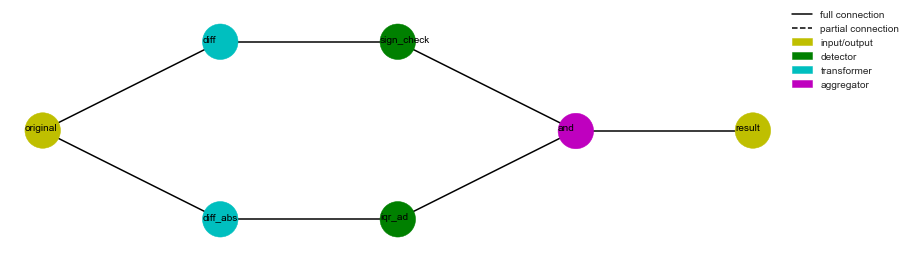

In [64]:
level_shift_ad.pipe_.plot_flowchart()

In [65]:
level_shift_ad.pipe_.get_params()

{'diff_abs': {'window': 5,
  'agg': 'median',
  'agg_params': None,
  'center': True,
  'min_periods': None},
 'iqr_ad': {'c': (None, 1)},
 'diff': {'window': 5,
  'agg': 'median',
  'agg_params': None,
  'center': True,
  'min_periods': None},
 'sign_check': {'low': inf, 'high': -inf},
 'and': {}}

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

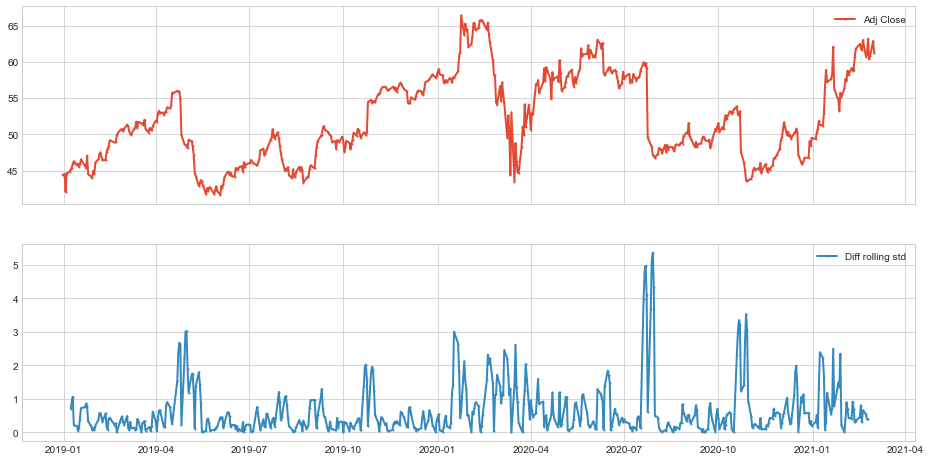

In [63]:
from adtk.transformer import DoubleRollingAggregate

s_transformed = DoubleRollingAggregate(agg='std',window=5,diff='l2').transform(s).rename('Diff rolling std')
plot(pd.concat([s,s_transformed],axis=1),ts_linewidth=2)

[*********************100%***********************]  1 of 1 completed


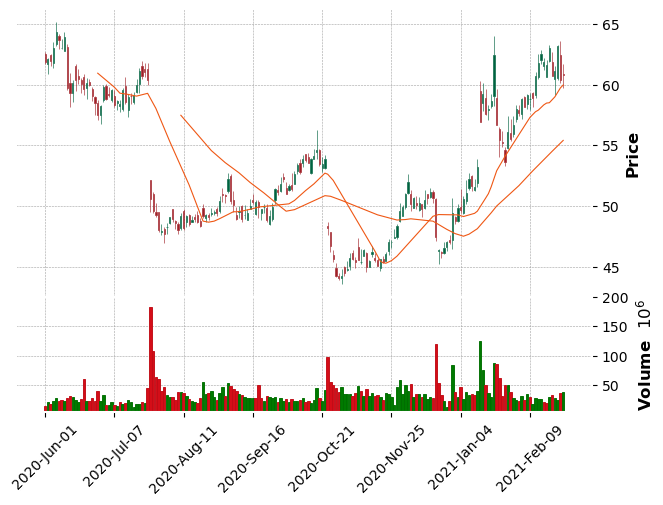

In [87]:
# Initialize with stock name
stock_name = 'INTC'
data_INTEL= yf.pdr_override(stock_name,start='2020-6-1')
plot_chart(data_INTEL,stock_name)

## Analyze other stock. Please get the stock code from yahoo finance.

In [3]:
data_SOLUTN = yf.pdr_override('0093.KL',start='2020-1-1')['Adj Close']
data_Kanger = yf.pdr_override('0170.KL',start='2020-1-1')['Adj Close']
data_revenue = yf.pdr_override('0200.KL',start='2019-1-1')['Adj Close']

C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Calculate average return over period of time stated

In [12]:
SOLUTION_returns = np.log(data_SOLUTN/data_SOLUTN.shift(1))
Kanger_returns = np.log(data_Kanger/data_Kanger.shift(1))
revenue_returns = np.log(data_revenue/data_revenue.shift(1))

In [13]:
print(revenue_returns.mean())
print(SOLUTION_returns.mean())
print(Kanger_returns.mean())

0.0015590870968722012
0.009152887560556223
0.001597120544406288


In [66]:
print("Vaccine stock returns averagely for Solution, Kanger and Revenue")
print(f"Solution return {SOLUTION_returns.mean()*250}")
print(f"Kanger return {Kanger_returns.mean()*250}")
print(f"Revenue return {revenue_returns.mean()*250}")

Vaccine stock returns averagely for Solution, Kanger and Revenue
Solution return 2.288221890139056
Kanger return 0.399280136101572
Revenue return 0.3897717742180503


## Moving Average Strategy Back Test
https://towardsdatascience.com/data-science-in-finance-56a4d99279f7

In [88]:
df = data_INTEL
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]
for i in SMAs:
    df["SMA_"+str(i)]= df.iloc[:,4].rolling(window=i).mean()

In [89]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df.index:
    SMA_short=df['SMA_20']
    SMA_long =df['SMA_50']
    close=df['Adj Close'][i]
    
    if(SMA_short[i] > SMA_long[i]):                          #line 9
        print('Up trend')
        if(position==0):
            buyP=close   #buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i]):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)                      #line 23
    if(counter==df["Adj Close"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)
counter+=1
print(percentChange)

Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Up trend
Buy at the price51.095947265625
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Down trend
Sell at the price45.09627151489258
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down

In [90]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 2020-06-01 00:00:00 up to now with 1 trades:
SMAs used: [20, 50]
Total return over 1 trades: -11.74%


In [91]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'
if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)

Average Gain: 0
Average Loss: -11.741979690762538
Max Return: unknown
Max Loss: -11.741979690762538
Gain/loss ratio: -0.0


## Misc on analyzing general trend of indexes of KLSE and Nasdaq (IXIC)

This indicate how much earning you generally can get from these exchange in comparison

In [68]:
tickers = ['^KLSE','^IXIC']
ind_data = pd.DataFrame()
for t in tickers:
    print(f"For current ticker : {t}")
    ind_data[t] = yf.pdr_override(t,start='2020-1-1')['Adj Close']

For current ticker : ^KLSE
[*********************100%***********************]  1 of 1 completed
For current ticker : ^IXIC
[*********************100%***********************]  1 of 1 completed


In [69]:
ind_data

,^KLSE,^IXIC
Date,,
2020-01-02,1602.500000,9092.190430
2020-01-03,1611.380005,9020.769531
2020-01-06,1597.760010,9071.469727
2020-01-07,1611.040039,9068.580078
2020-01-08,1589.099976,9129.240234
...,...,...
2021-02-22,1570.459961,13533.049805
2021-02-23,1565.050049,13465.200195
2021-02-24,1557.550049,13597.969727


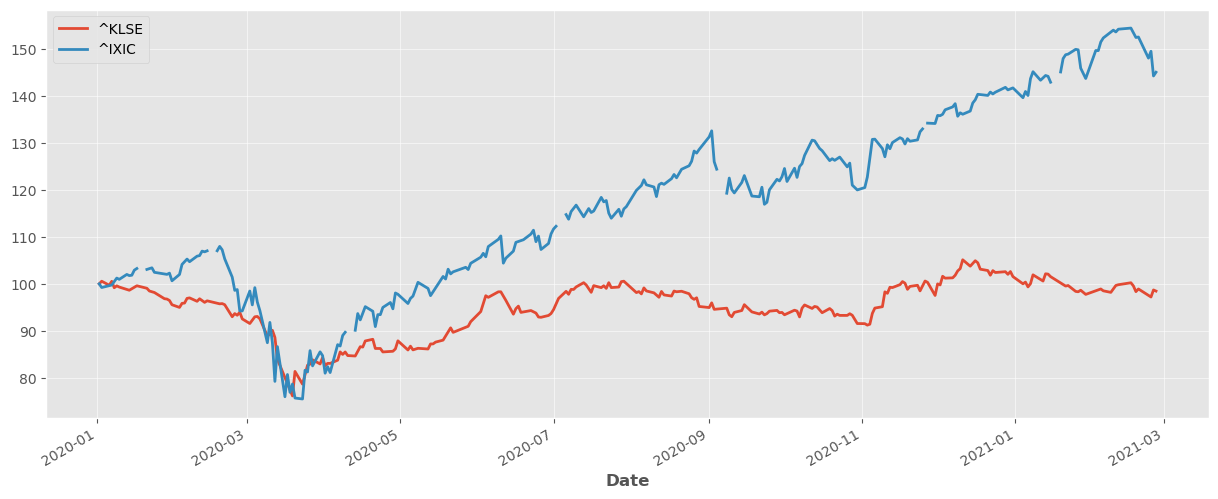

In [70]:
(ind_data/ind_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show()

In [71]:
ind_data/ind_data.iloc[0] * 100

,^KLSE,^IXIC
Date,,
2020-01-02,100.000000,100.000000
2020-01-03,100.554134,99.214481
2020-01-06,99.704213,99.772104
2020-01-07,100.532920,99.740323
2020-01-08,99.163805,100.407490
...,...,...
2021-02-22,98.000622,148.842569
2021-02-23,97.663030,148.096328
2021-02-24,97.195011,149.556587


In [73]:
indexes_return = np.log(ind_data/ind_data.shift(1))

In [74]:
annual_return = indexes_return.mean() * 250
annual_return

^KLSE   -0.013799
^IXIC    0.340495
dtype: float64

## Parsing the quarterly report out from yahoo finance

In [76]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

import requests, lxml
from lxml import html


class statistics:
    base_url = "https://finance.yahoo.com/"

    def __init__(self, symbol):
        '''

        :param symbol: stock symbol in all caps
        please note that any Canadian TSX stocks are followed with ".TO" ... check the relevant URL for formatting.
        '''
        self.symbol = symbol.upper()
        self.path = "quote/{0}/key-statistics?p={0}".format(symbol)
        self.historical = "quote/{0}/history?p={0}".format(symbol)
        self.url = self.base_url + self.path
        self.url_historical = self.base_url + self.historical
        self.methods = ['scrape_page', 'label_stats']
        self.attributes = ['self.symbol', 'self.path', 'self.url','self.methods', 'self.hdrs', \
                           'self.valuation', 'self.fiscal_year', \
                           'self.profitability', 'self.manager_effect', \
                            'self.income_statement', 'self.balance_sheet', 'self.cash_statement', \
                            'self.price_history', 'self.share_stats', 'self.dividendSplit']
        self.hdrs = {"authority": "finance.yahoo.com",
                     "method": "GET",
                     "path": self.path,
                     "scheme": "https",
                     "accept": "text/html,application/xml;q=0.9",
                     "accept-encoding": "gzip, deflate, br",
                     "accept-language": "en-US,en;q=0.9",
                     "referer": self.base_url,
                     "sec-fetch-mode": "navigate",
                     "sec-fetch-site": "same-origin",
                     "sec-fetch-user": "?1",
                     "upgrade-insecure-requests": "1",
                     "user-agent": "Mozilla/5.0 (Windows NT 10.0;)"}
        
        self.hdrs_historical = {"authority": "finance.yahoo.com",
             "method": "GET",
             "path": self.historical,
             "scheme": "https",
             "accept": "text/html,application/xml;q=0.9",
             "accept-encoding": "gzip, deflate, br",
             "accept-language": "en-US,en;q=0.9",
             "referer": self.base_url,
             "sec-fetch-mode": "navigate",
             "sec-fetch-site": "same-origin",
             "sec-fetch-user": "?1",
             "upgrade-insecure-requests": "1",
             "user-agent": "Mozilla/5.0 (Windows NT 10.0;)"}


    def scrape_page(self):
        '''

        :return: scrapes the content of the class URL,
                   using headers defined in the init function,
                   returning a byte string of html code.
        '''
        page = requests.get(self.url, headers=self.hdrs)
        page_historical = requests.get(self.url_historical, headers=self.hdrs_historical)
        soup = BeautifulSoup(page.content, 'lxml')
        soup_historical = BeautifulSoup(page_historical.content, 'lxml')
        tables = soup.find_all('table')
        tables_historical = soup.find_all('table')
        iterator = range(0, len(tables))
        iterator_historical = range(0, len(tables_historical))
        function = lambda x: pd.read_html(str(tables[x]))
        function_historical = lambda x: pd.read_html(str(tables_historical[x]))
        table_list = list(map(function, iterator))
        table_list_historical = list(map(function_historical, iterator_historical))
        return table_list,table_list_historical

    def label_stats(self, table_list):
        '''

        :param table_list: uses the output of the scrape_page method
        :return: creates attributes for the statistics class object,
                 uses indexLabel method to label columns and set the dataframes' index
        
        '''
        iterator = [table_list[i][0] for i in range(0, len(table_list))]
        table_list = list(map(lambda df: self.__indexLabel__(df), iterator))
        self.valuation, self.fiscal_year, self.profitability, self.manager_effect, \
        self.income_statement, self.balance_sheet, self.cash_statement, \
        self.price_history, self.share_stats, self.dividendSplit = table_list
        return table_list

    def __indexLabel__(self, df):
        '''
        
        :param df: Takes a dataframe as input.
        :return: returns a dataframe with column labels and a set index.
        
        '''
        df.columns = ['Measure', 'Value']
        df = df.set_index('Measure')
        return df

if __name__ == "__main__":
    shopify_stats = statistics('INTC')
    table_list,table_list_historical = shopify_stats.scrape_page()
    table_list = shopify_stats.label_stats(table_list)

In [77]:
table_list_historical

[[                             0        1
  0      Market Cap (intraday) 5  246.95B
  1           Enterprise Value 3  259.98B
  2                 Trailing P/E    12.30
  3                Forward P/E 1    12.53
  4  PEG Ratio (5 yr expected) 1     2.28
  5            Price/Sales (ttm)     3.17
  6             Price/Book (mrq)     3.05
  7   Enterprise Value/Revenue 3     3.34
  8    Enterprise Value/EBITDA 6     7.20],
 [                          0       1
  0         Beta (5Y Monthly)    0.67
  1          52-Week Change 3   4.47%
  2   S&P500 52-Week Change 3  23.92%
  3            52 Week High 3   65.11
  4             52 Week Low 3   43.61
  5   50-Day Moving Average 3   58.60
  6  200-Day Moving Average 3   51.51],
 [                                                 0       1
  0                              Avg Vol (3 month) 3  39.42M
  1                               Avg Vol (10 day) 3  29.27M
  2                             Shares Outstanding 5    4.1B
  3                         

## Facebook prophet API on change point detection

In [117]:
from fbprophet import Prophet

In [120]:
data_INTEL = data_INTEL.reset_index()

In [121]:
data_INTEL = data_INTEL.iloc[:-50,:]

In [122]:
# data_INTEL = data_INTEL.reset_index()
data_train = data_INTEL

In [123]:
data_train

,Date,Adj Close
0,2018-12-31,44.407246
1,2019-01-02,44.549191
2,2019-01-03,42.098412
3,2019-01-04,44.681660
4,2019-01-07,44.889828
...,...,...
509,2021-01-07,51.875122
510,2021-01-08,51.338383
511,2021-01-11,51.229046
512,2021-01-12,52.918789


In [124]:
data_train = data_train.rename(columns={"Date": "ds","Adj Close":'y'})
# data_test = data_test.rename(columns={"Date": "ds","Adj Close":'y'})

In [125]:
data_train  = data_train.reset_index()
# data_test = data_test.reset_index()

In [126]:
data_train.sort_values('ds')

,index,ds,y
0,0,2018-12-31,44.407246
1,1,2019-01-02,44.549191
2,2,2019-01-03,42.098412
3,3,2019-01-04,44.681660
4,4,2019-01-07,44.889828
...,...,...,...
509,509,2021-01-07,51.875122
510,510,2021-01-08,51.338383
511,511,2021-01-11,51.229046
512,512,2021-01-12,52.918789


In [127]:
change_point[:-5]

['2019-04-24 00:00:00',
 '2019-04-25 00:00:00',
 '2019-04-26 00:00:00',
 '2019-04-29 00:00:00',
 '2019-04-30 00:00:00',
 '2019-05-07 00:00:00',
 '2019-05-08 00:00:00',
 '2019-05-09 00:00:00',
 '2019-05-10 00:00:00',
 '2019-05-13 00:00:00',
 '2019-08-01 00:00:00',
 '2019-08-02 00:00:00',
 '2019-09-03 00:00:00',
 '2019-09-04 00:00:00',
 '2019-09-05 00:00:00',
 '2019-09-06 00:00:00',
 '2019-10-23 00:00:00',
 '2019-10-24 00:00:00',
 '2019-10-25 00:00:00',
 '2019-10-28 00:00:00',
 '2019-10-29 00:00:00',
 '2020-01-22 00:00:00',
 '2020-01-23 00:00:00',
 '2020-01-24 00:00:00',
 '2020-02-20 00:00:00',
 '2020-02-21 00:00:00',
 '2020-02-24 00:00:00',
 '2020-02-25 00:00:00',
 '2020-02-26 00:00:00',
 '2020-02-27 00:00:00',
 '2020-03-06 00:00:00',
 '2020-03-09 00:00:00',
 '2020-03-10 00:00:00',
 '2020-03-11 00:00:00',
 '2020-03-12 00:00:00',
 '2020-03-13 00:00:00',
 '2020-03-16 00:00:00',
 '2020-03-17 00:00:00',
 '2020-03-23 00:00:00',
 '2020-03-24 00:00:00',
 '2020-03-25 00:00:00',
 '2020-03-26 00:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyError: 'delta'

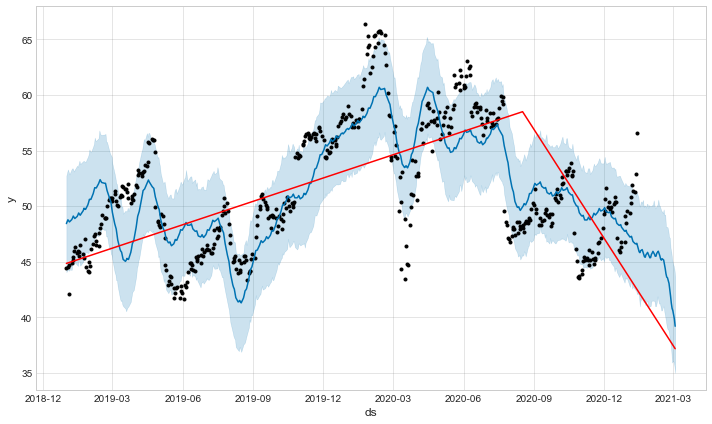

In [137]:
model = Prophet(changepoints = changepoint)
model.fit(data_train);
future = model.make_future_dataframe(periods=50)
forecast = model.predict(future)

# Python
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [139]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-31,44.843033,44.053694,52.746474,44.843033,44.843033,3.586433,3.586433,3.586433,0.027415,0.027415,0.027415,3.559018,3.559018,3.559018,0.0,0.0,0.0,48.429466
1,2019-01-02,44.888938,44.335772,53.300335,44.888938,44.888938,3.883151,3.883151,3.883151,0.257759,0.257759,0.257759,3.625392,3.625392,3.625392,0.0,0.0,0.0,48.772090
2,2019-01-03,44.911891,44.176807,53.076266,44.911891,44.911891,3.761234,3.761234,3.761234,0.105000,0.105000,0.105000,3.656234,3.656234,3.656234,0.0,0.0,0.0,48.673125
3,2019-01-04,44.934844,44.291008,52.856719,44.934844,44.934844,3.645996,3.645996,3.645996,-0.039154,-0.039154,-0.039154,3.685150,3.685150,3.685150,0.0,0.0,0.0,48.580840
4,2019-01-07,45.003703,44.270780,53.347649,45.003703,45.003703,3.786401,3.786401,3.786401,0.027415,0.027415,0.027415,3.758986,3.758986,3.758986,0.0,0.0,0.0,48.790104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2021-02-28,37.598869,35.922705,45.217856,37.598869,37.598869,3.197385,3.197385,3.197385,-0.237898,-0.237898,-0.237898,3.435283,3.435283,3.435283,0.0,0.0,0.0,40.796254
560,2021-03-01,37.491684,36.060249,44.841319,37.491684,37.491684,3.093254,3.093254,3.093254,0.027415,0.027415,0.027415,3.065840,3.065840,3.065840,0.0,0.0,0.0,40.584938
561,2021-03-02,37.384498,36.003618,44.640171,37.384498,37.384498,2.811691,2.811691,2.811691,0.124777,0.124777,0.124777,2.686913,2.686913,2.686913,0.0,0.0,0.0,40.196189
562,2021-03-03,37.277313,35.642580,44.329423,37.277313,37.277313,2.559916,2.559916,2.559916,0.257759,0.257759,0.257759,2.302157,2.302157,2.302157,0.0,0.0,0.0,39.837229


In [138]:
m = Prophet(changepoints=change_point)
forecast = m.fit(data_train).predict(future)
m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ValueError: Changepoints must fall within training data.

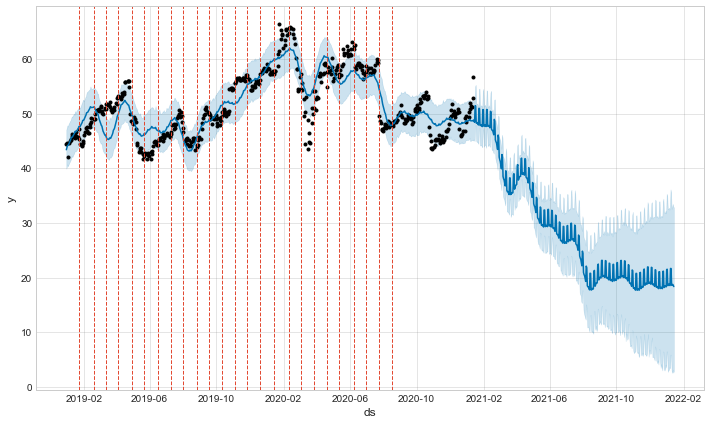

In [133]:
figure = model.plot(forecast)
for changepoint in model.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

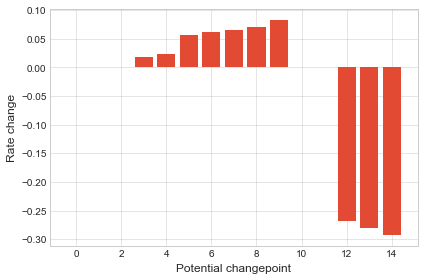

In [54]:
deltas = model.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()